In [161]:
# 딥러닝의 유관장
import tensorflow as tf
import numpy as np
import pandas as pd

In [162]:
readfile = pd.read_csv('통합데이터.csv')

In [163]:
readfile

,일자,금리,무역수지,실업률,환율,주식예탁금,주가
0,Aug-00,7.9,1346.0,3.8,1108.8,8475653,720.4
1,Sep-00,8.0,1841.0,3.7,1115.1,7537045,622.9
2,Oct-00,7.8,1144.0,3.5,1139.0,7029036,548.1
3,Nov-00,7.3,829.0,3.7,1214.3,7079419,544.1
4,Dec-00,6.8,1801.0,4.2,1264.5,6057559,526.4
...,...,...,...,...,...,...,...
240,20-Aug,0.8,4561.2,3.1,1187.8,60526989,2326.1
241,20-Sep,0.9,10174.7,3.6,1169.5,53880132,2327.9
242,20-Oct,0.9,6617.6,3.7,1135.1,55039833,2267.1
243,20-Nov,1.0,6528.4,3.4,1106.5,61587622,2591.3


In [164]:
readfile_v = readfile[['금리','무역수지','실업률','환율','주가']]
np_orgin = np.array(readfile_v)

In [165]:
from sklearn import preprocessing

readfile_v = readfile[['금리','무역수지','실업률','환율','주식예탁금','주가']]

np_orgin = preprocessing.StandardScaler().fit_transform(readfile_v)
#np_orgin = np.array(readfile_v)

In [166]:
np_orgin

array([[ 2.70262895, -0.62902362,  0.48362328, -0.18598424, -0.87017519,
        -1.51930964],
       [ 2.76479627, -0.4582153 ,  0.27791546, -0.12549822, -0.96922778,
        -1.68670982],
       [ 2.64046163, -0.69872721, -0.13350018,  0.10396464, -1.02283867,
        -1.8151358 ],
       ...,
       [-1.64908324,  1.1900332 ,  0.27791546,  0.06652091,  4.04380683,
         1.13625809],
       [-1.58691592,  1.15925319, -0.339208  , -0.20806644,  4.73480402,
         1.69288514],
       [-1.58691592,  1.15148918, -0.339208  , -0.24455007,  4.73480402,
         2.05361106]])

In [167]:
#훈련데이터 -> 훈련, 테스트
#테스트데이터
c_size = np_orgin[0].size - 1

origin_x = np_orgin[:,:c_size]
origin_y = np_orgin[:,c_size:]
train_x = np_orgin[:220,:c_size]
train_y = np_orgin[:220,c_size:]
test_x = np_orgin[220:,:c_size]
test_y = np_orgin[220:,c_size:]

origin_x.shape, train_x.shape, test_y.shape

((245, 5), (220, 5), (25, 1))

In [168]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=152, activation='relu', input_shape=(c_size,)),
    
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(units=139, activation='relu'),
    tf.keras.layers.Dense(units=126, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [169]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse')
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 152)               912       
_________________________________________________________________
dropout_11 (Dropout)         (None, 152)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 139)               21267     
_________________________________________________________________
dense_80 (Dense)             (None, 126)               17640     
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 127       
Total params: 39,946
Trainable params: 39,946
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = model.fit(
    train_x,
    train_y,
    epochs = 6000,
    validation_split = 0.1,
    verbose = 1,
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=30, monitor='val_loss')]
)

Epoch 1/6000
7/7 [==============================] - 0s 22ms/step - loss: 0.9138 - val_loss: 1.7712
Epoch 2/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.7656 - val_loss: 1.6846
Epoch 3/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.7818 - val_loss: 1.6080
Epoch 4/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.6930 - val_loss: 1.5132
Epoch 5/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5792 - val_loss: 1.4081
Epoch 6/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5587 - val_loss: 1.3223
Epoch 7/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5754 - val_loss: 1.2155
Epoch 8/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.5021 - val_loss: 1.1093
Epoch 9/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4710 - val_loss: 0.9968
Epoch 10/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.4151 - val_loss: 0.8844
Epoch 11/6000
7/7 

Epoch 84/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.0822 - val_loss: 0.2362
Epoch 85/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.0776 - val_loss: 0.2381
Epoch 86/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.0803 - val_loss: 0.2288
Epoch 87/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.0768 - val_loss: 0.2312
Epoch 88/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.0772 - val_loss: 0.2323
Epoch 89/6000
7/7 [==============================] - 0s 7ms/step - loss: 0.0779 - val_loss: 0.2357
Epoch 90/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.0648 - val_loss: 0.2240
Epoch 91/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.0668 - val_loss: 0.2310
Epoch 92/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.0811 - val_loss: 0.2283
Epoch 93/6000
7/7 [==============================] - 0s 6ms/step - loss: 0.0717 - val_loss: 0.2257
Epoch 94/6

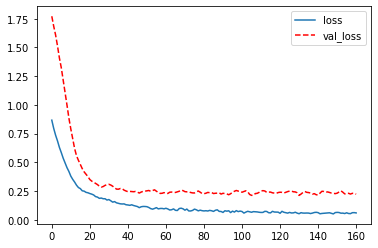

In [171]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

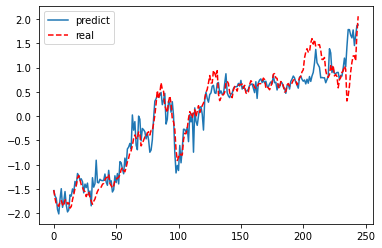

In [172]:
result = model.predict(origin_x)

plt.plot(result, label='predict')
plt.plot(origin_y, 'r--', label='real')
plt.legend()
plt.show()

In [173]:
# 학습과정 들쑥날쑥하다
# 데이터정규화 
# 과적합

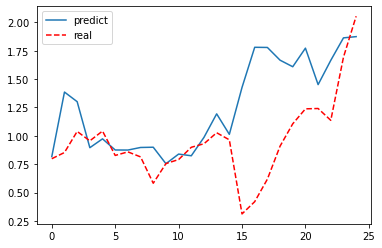

In [174]:
result = model.predict(test_x)

plt.plot(result, label='predict')
plt.plot(test_y, 'r--', label='real')
plt.legend()
plt.show()